<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 191T - Machine Learning
# Name: John Eagan 
# Assignment: Titanic

In [677]:
import sklearn
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reading the Training Data

In [678]:
titanicTrain = pd.read_csv("https://raw.githubusercontent.com/JohnEaganFS/CSCI191T/main/datasets/titanic_train.csv")
titanicTrain.info()
titanicTrain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [679]:
print("Missing Values: ")
print(titanicTrain.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Feature Processing

In [680]:
train_data = titanicTrain.copy()
# Removing Survived because that will be the label
# Removing Cabin for now because it has a lot of missing values
# Removing Name and Ticket because they are difficult to process
train_data.drop(columns=['Survived', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
# Replacing missing age values with median age
train_data["Age"].fillna(titanicTrain["Age"].median(skipna=True), inplace=True)
# Replacing missing embarked values with most common embarked value
train_data["Embarked"].fillna(titanicTrain['Embarked'].value_counts().idxmax(), inplace=True)

# Applying One-Hot Encoding to Embarked, Sex, and Pclass
train_data = pd.get_dummies(train_data, columns=["Embarked", "Sex", "Pclass"])
train_data

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,0,0,1,0,1,0,1,0
887,888,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,889,28.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


# Logistic Regression

In [681]:
clf = LogisticRegression(solver='lbfgs',
                        max_iter=10000)
clf.fit(train_data, titanicTrain['Survived'])

LogisticRegression(max_iter=10000)

In [682]:
yPred = clf.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8047138047138047


# MLP

In [683]:
from sklearn.neural_network import MLPClassifier

In [684]:
clfMLP = MLPClassifier()
clfMLP.fit(train_data, titanicTrain['Survived'])

MLPClassifier()

In [685]:
yPred = clfMLP.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8013468013468014


# Grid Search

The default MLP didn't perform as well as I liked so I decided to perform a grid search over some possible parameter options.

In [686]:
from sklearn.model_selection import GridSearchCV

In [687]:
parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

In [688]:
#mlp = MLPClassifier()
#clfMLP = GridSearchCV(mlp, parameters)
#clfMLP.fit(train_data, titanicTrain['Survived'])

In [689]:
# Best parameter set
#print('Best parameters found:\n', clfMLP.best_params_)

In [690]:
best_params = {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}

## Training new MLP model based on best parameters found by Grid Search

In [691]:
clfMLP = MLPClassifier( max_iter = 1000,
                        activation = best_params['activation'],
                        hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        learning_rate = best_params['learning_rate'],
                        alpha = best_params['alpha'],
                        solver = best_params['solver'])
clfMLP.fit(train_data, titanicTrain['Survived'])

MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=1000)

In [692]:
yPred = clfMLP.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8484848484848485


# Test Set

In [693]:
titanicTest = pd.read_csv("https://raw.githubusercontent.com/JohnEaganFS/CSCI191T/main/datasets/titanic_test.csv")
titanicTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Applying data processing and transformations to test set

In [694]:
test_data = titanicTest.copy()
test_data.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data["Age"].fillna(titanicTest["Age"].median(skipna=True), inplace=True)
test_data["Embarked"].fillna(titanicTest['Embarked'].value_counts().idxmax(), inplace=True)
# The test data has one missing fare value so I replaced it with the median value
test_data["Fare"].fillna(titanicTest['Fare'].median(skipna=True), inplace=True)

test_data = pd.get_dummies(test_data, columns=["Embarked", "Sex", "Pclass"])
from google.colab import data_table
data_table.enable_dataframe_formatter()
print(test_data.info())
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked_C   418 non-null    uint8  
 6   Embarked_Q   418 non-null    uint8  
 7   Embarked_S   418 non-null    uint8  
 8   Sex_female   418 non-null    uint8  
 9   Sex_male     418 non-null    uint8  
 10  Pclass_1     418 non-null    uint8  
 11  Pclass_2     418 non-null    uint8  
 12  Pclass_3     418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB
None
   PassengerId   Age  SibSp  Parch  ...  Sex_male  Pclass_1  Pclass_2  Pclass_3
0          892  34.5      0      0  ...         1         0         0         1
1          893  47.0      1      0  ...

## Logistic Regression Prediction Results

In [695]:
predict = clf.predict(test_data)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionLR.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionLR.csv', index=False, header=True)

In [696]:
titanicSolution = pd.read_csv("https://raw.githubusercontent.com/JohnEaganFS/CSCI191T/main/datasets/titanic_solution.csv")
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7655502392344498


## MLP Prediction Results

In [697]:
predict = clfMLP.predict(test_data)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionMLP.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionMLP.csv', index=False, header=True)

In [698]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7583732057416268


# A Second Attempt

In [699]:
titanicTrain = pd.read_csv("https://raw.githubusercontent.com/JohnEaganFS/CSCI191T/main/datasets/titanic_train.csv")
titanicTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Sklearn Libraries for Data Processing and Pipelined Transformations

In [700]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

### Data Transformation

In [701]:
train_data = titanicTrain.copy()
# Dropping columns I won't be using
train_data.drop(columns=['Ticket', 'PassengerId', 'Survived'], axis=1, inplace=True)

#### Pulling Deck Letter from Cabin feature

In [702]:
import re # Regular Expression
cabinData = train_data['Cabin']
cabinData = cabinData.fillna("U")
deckData = cabinData.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
deckData = deckData.replace("T","U")
train_data['Deck'] = deckData
train_data.drop(columns=['Cabin'], axis=1, inplace=True)
print(train_data['Deck'].value_counts())

U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64


#### Pulling out some important/common titles from the Name feature

In [703]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
titleData = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titleData = [title if title in titles else "Other" for title in titleData]
train_data['Title'] = titleData
train_data.drop(columns=['Name'], axis=1, inplace=True)
print(train_data['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64


#### Sklearn Pipelines and Column Transformations

In [704]:
embarkedPipe = Pipeline([
  ("naFillMostCommon", SimpleImputer(strategy="most_frequent")),
  ("OHE", OneHotEncoder()),
  #("scale", StandardScaler())
])

agePipe = Pipeline([
  ("fillAge", IterativeImputer(initial_strategy="median")),
  #("fillAge", SimpleImputer(strategy="median")),
  #("scale", StandardScaler())               
])

farePipe = Pipeline([
  ("fillFare", IterativeImputer(random_state=0,initial_strategy="mean")),
  #("fillFare", SimpleImputer(strategy="mean")),
  #("scale", StandardScaler())
])

ct = ColumnTransformer([
  ("fillAge", agePipe, ['Age']),
  ("fillFare", farePipe, ['Fare']),
  ("fillTransformEmbarked", embarkedPipe, ['Embarked']),
  ("OHE", OneHotEncoder(), ['Sex', 'Pclass', 'Deck', 'Title'])
  ],
  remainder='passthrough')

train_data = ct.fit_transform(train_data)
train_data = pd.DataFrame(data=train_data, columns=["Age","Fare","S","C","Q","Female","Male","Pclass1","Pclass2","Pclass3","A","B","C","D","E","F","G","U","Master","Miss","Mr","Mrs","Other","SibSp","Parch"])

#### Using Sibling/Spouse and Parents/Children feature to build new features

In [705]:
train_data['familySize'] = [x + y + 1 for (x,y) in zip(train_data['SibSp'],train_data['Parch'])]
train_data['travelAlone'] = [1 if x == 1 else 0 for x in train_data['familySize']]
train_data

,Age,Fare,S,C,Q,Female,Male,Pclass1,Pclass2,Pclass3,A,B,C,D,E,F,G,U,Master,Miss,Mr,Mrs,Other,SibSp,Parch,familySize,travelAlone
0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0
1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
2,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,35.0,53.1000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
4,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
887,19.0,30.0000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
888,28.0,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0
889,26.0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


#### Training Set Results

##### Logistic Regression

In [706]:
clf = LogisticRegression(max_iter=10000)
clf.fit(train_data, titanicTrain['Survived'])
yPred = clf.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8383838383838383


##### MLP

In [707]:
clfMLP = MLPClassifier( max_iter = 1000,
                        activation = best_params['activation'],
                        hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        learning_rate = best_params['learning_rate'],
                        alpha = best_params['alpha'],
                        solver = best_params['solver'])
clfMLP.fit(train_data, titanicTrain['Survived'])
yPred = clfMLP.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.9079685746352413


##### Random Forest

In [708]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
random_forest.fit(train_data, titanicTrain['Survived'])
yPred = random_forest.predict(train_data)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.9023569023569024


#### Test Set Results

In [709]:
test_data = titanicTest.copy()
test_data.drop(columns=['Ticket', 'PassengerId'], axis=1, inplace=True)
cabinData = test_data['Cabin']
cabinData = cabinData.fillna("U")
deckData = cabinData.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test_data['Deck'] = deckData
test_data.drop(columns=['Cabin'], axis=1, inplace=True)

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
titleData = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titleData = [title if title in titles else "Other" for title in titleData]
test_data['Title'] = titleData
test_data.drop(columns=['Name'], axis=1, inplace=True)

test_data = ct.fit_transform(test_data)
test_data = pd.DataFrame(data=test_data, columns=["Age","Fare","S","C","Q","Female", "Male","Pclass1" ,"Pclass2", "Pclass3","A","B","C","D","E","F","G","U","Master","Miss","Mr","Mrs","Other","SibSp","Parch"])
test_data['familySize'] = [x + y + 1 for (x,y) in zip(test_data['SibSp'],test_data['Parch'])]
test_data['travelAlone'] = [1 if x == 1 else 0 for x in test_data['familySize']]
test_data

,Age,Fare,S,C,Q,Female,Male,Pclass1,Pclass2,Pclass3,A,B,C,D,E,F,G,U,Master,Miss,Mr,Mrs,Other,SibSp,Parch,familySize,travelAlone
0,34.5,7.8292,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,47.0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
2,62.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,27.0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,22.0,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
414,39.0,108.9000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
415,38.5,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
416,27.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


##### Logistic Regression

In [710]:
predict = clf.predict(test_data)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionLRImputer.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionLRImputer.csv', index=False, header=True)

In [711]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7655502392344498


##### MLP

In [712]:
predict = clfMLP.predict(test_data)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionMLPImputer.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionMLPImputer.csv', index=False, header=True)

In [713]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7464114832535885


Accuracy has improved on the training set, but not on the test set. This implies to me that the models are most likely overfitting on the training set.

##### Random Forest

In [714]:
predict = random_forest.predict(test_data)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionRandomForest.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionRandomForest.csv', index=False, header=True)

In [715]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7631578947368421


# Removing Features

To reduce overfitting, I'm going to try to reduce the complexity of my model by only using some of the most important features.

## Logistic Regression Weights

People with Master as a title seem to have a significant increase in survival probability. Features involving the gender of the person also seem to have a big effect on that person's survival.

Those in the E deck had a greater chance of surivival and those with a ticket class 3 had a lower chance of survival.

In [716]:
print(list(zip(train_data.columns, clf.coef_[0])))
featureWeights = pd.DataFrame(data=clf.coef_, columns=train_data.columns)
display(featureWeights.sort_values(by=0, axis=1))
featureWeights = featureWeights.abs()
display(featureWeights.sort_values(by=0, axis=1, ascending=False))

[('Age', -0.02901676551420325), ('Fare', 0.004101591287415614), ('S', 0.1595109051218346), ('C', 0.08894421119116101), ('Q', -0.25770538518373354), ('Female', 0.9414489540872892), ('Male', -0.9506992229583121), ('Pclass1', 0.5539601722262223), ('Pclass2', 0.19306605701573074), ('Pclass3', -0.7562764981127496), ('A', 0.06162781172328353), ('B', 0.0858543824626069), ('C', -0.30201731847356933), ('D', 0.5519428873711099), ('E', 0.8667657567190509), ('F', 0.07660883720735608), ('G', -0.6545423157820093), ('U', -0.695490310098171), ('Master', 1.7227496477223625), ('Miss', -0.2834418667208641), ('Mr', -1.2327469125752892), ('Mrs', 0.3905658885225117), ('Other', -0.606377025819115), ('SibSp', -0.2516560921930208), ('Parch', -0.06936814872011882), ('familySize', -0.3302745097837749), ('travelAlone', -0.32875408070787127)]


,Mr,Male,Pclass3,U,G,Other,familySize,travelAlone,C,Miss,Q,SibSp,Parch,Age,Fare,A,F,B,C,S,Pclass2,Mrs,D,Pclass1,E,Female,Master
0,-1.232747,-0.950699,-0.756276,-0.69549,-0.654542,-0.606377,-0.330275,-0.328754,-0.302017,-0.283442,-0.257705,-0.251656,-0.069368,-0.029017,0.004102,0.061628,0.076609,0.085854,0.088944,0.159511,0.193066,0.390566,0.551943,0.55396,0.866766,0.941449,1.72275


,Master,Mr,Male,Female,E,Pclass3,U,G,Other,Pclass1,D,Mrs,familySize,travelAlone,C,Miss,Q,SibSp,Pclass2,S,C,B,F,Parch,A,Age,Fare
0,1.72275,1.232747,0.950699,0.941449,0.866766,0.756276,0.69549,0.654542,0.606377,0.55396,0.551943,0.390566,0.330275,0.328754,0.302017,0.283442,0.257705,0.251656,0.193066,0.159511,0.088944,0.085854,0.076609,0.069368,0.061628,0.029017,0.004102


In [717]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True, max_features=8)
train_reduced = model.transform(train_data)
test_reduced = model.transform(test_data)
pd.DataFrame(train_reduced)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [718]:
clf = LogisticRegression(max_iter=10000)
clf.fit(train_reduced, titanicTrain['Survived'])
yPred = clf.predict(train_reduced)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))
print(clf.coef_)

Accuracy =  0.8035914702581369
[[ 1.16999191 -1.16971251 -1.1091603   0.60975854 -0.63927153 -0.98530588
   1.6930465  -0.51785902]]


In [719]:
clfMLP = MLPClassifier( max_iter = 1000,
                        activation = best_params['activation'],
                        hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        learning_rate = best_params['learning_rate'],
                        alpha = best_params['alpha'],
                        solver = best_params['solver'])
clfMLP.fit(train_reduced, titanicTrain['Survived'])
yPred = clfMLP.predict(train_reduced)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8024691358024691


In [720]:
predict = clf.predict(test_reduced)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

In [721]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7727272727272727


In [722]:
predict = clfMLP.predict(test_reduced)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

In [723]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7703349282296651


Sci-kit learn's random forest models also have a feature_importances value

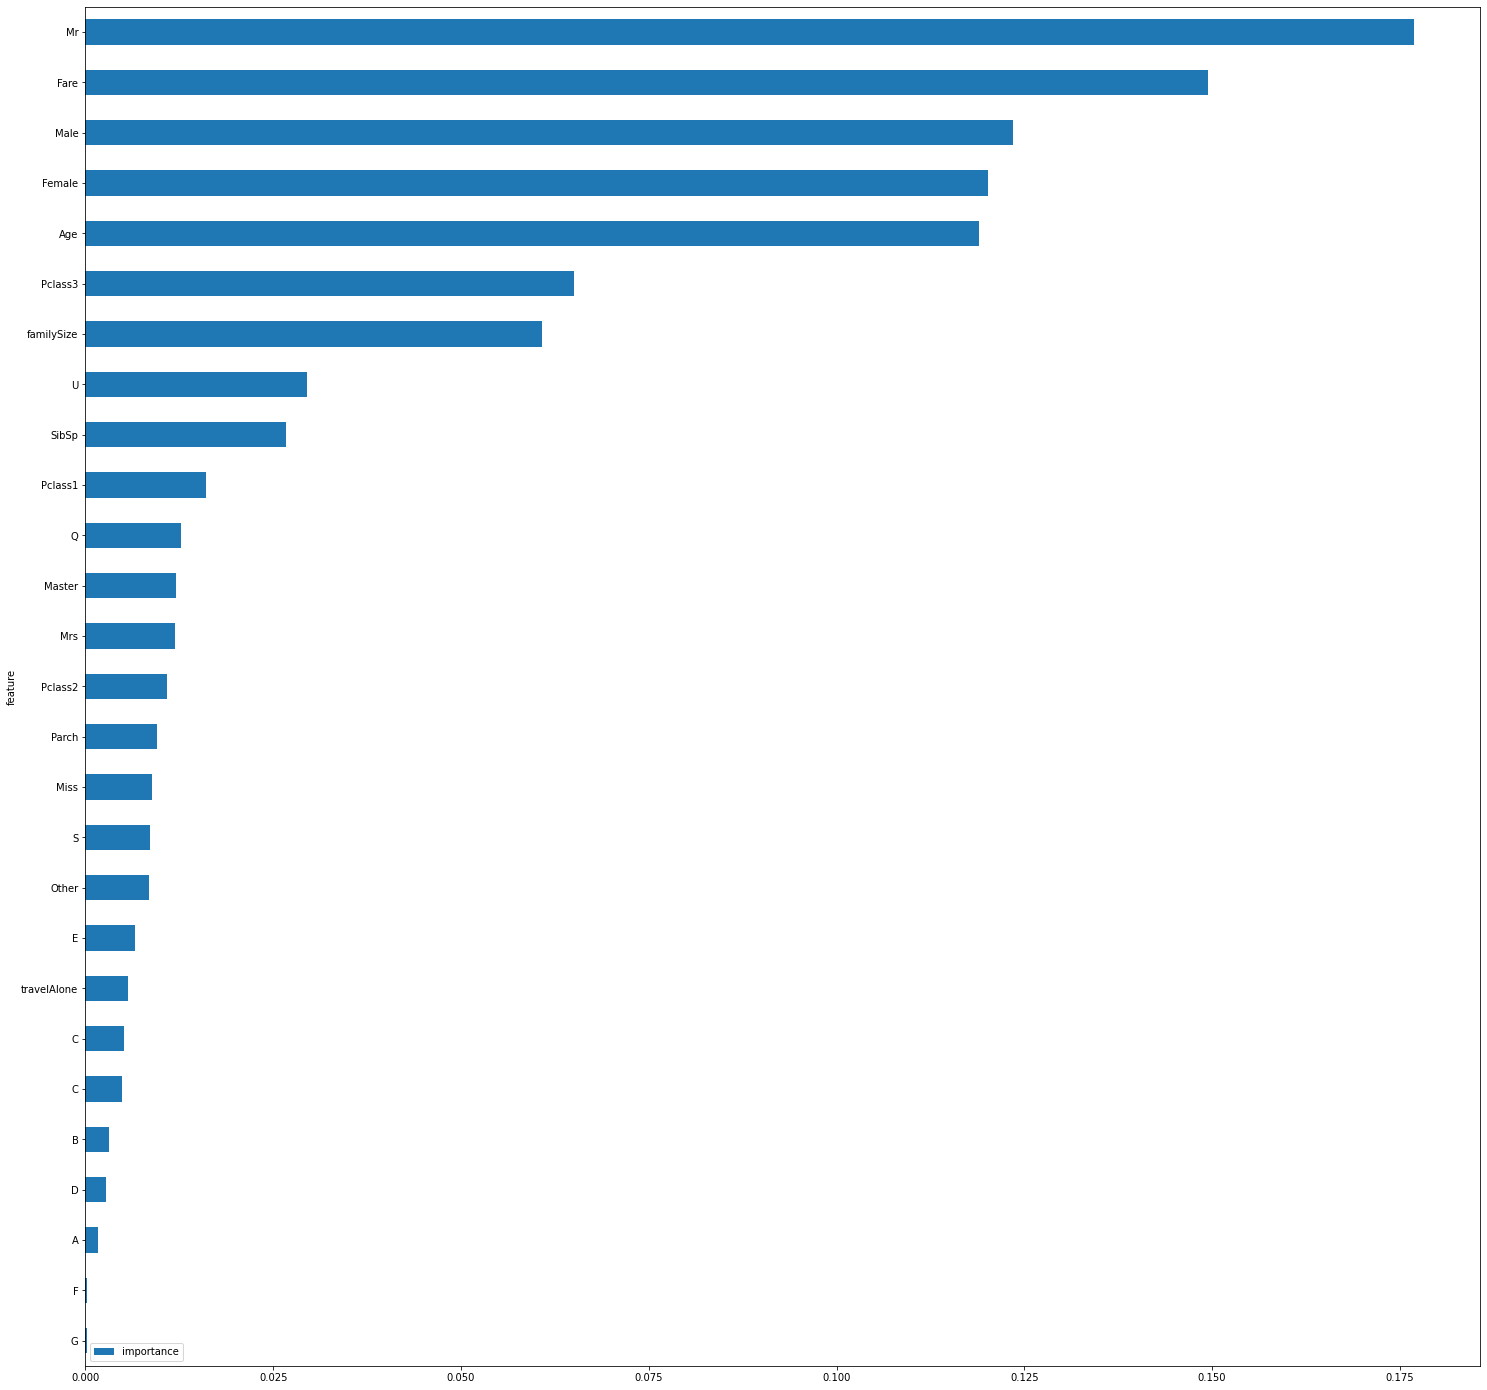

In [724]:
features = pd.DataFrame()
features['feature'] = train_data.columns
features['importance'] = random_forest.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [725]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(random_forest, prefit=True)
train_reduced = model.transform(train_data)
test_reduced = model.transform(test_data)
pd.DataFrame(train_reduced)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,0,1,2,3,4,5,6
0,22.0,7.2500,0.0,1.0,1.0,1.0,2.0
1,38.0,71.2833,1.0,0.0,0.0,0.0,2.0
2,26.0,7.9250,1.0,0.0,1.0,0.0,1.0
3,35.0,53.1000,1.0,0.0,0.0,0.0,2.0
4,35.0,8.0500,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
886,27.0,13.0000,0.0,1.0,0.0,0.0,1.0
887,19.0,30.0000,1.0,0.0,0.0,0.0,1.0
888,28.0,23.4500,1.0,0.0,1.0,0.0,4.0
889,26.0,30.0000,0.0,1.0,0.0,1.0,1.0


In [726]:
clf = LogisticRegression(max_iter=1000)
clf.fit(train_reduced, titanicTrain['Survived'])
yPred = clf.predict(train_reduced)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))
print(clf.coef_)

Accuracy =  0.8080808080808081
[[-0.02582644  0.00883088  0.62558993 -0.62566891 -1.22587756 -1.72623847
  -0.35262916]]


In [727]:
clfMLP = MLPClassifier( max_iter = 1000,
                        activation = best_params['activation'],
                        hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        learning_rate = best_params['learning_rate'],
                        alpha = best_params['alpha'],
                        solver = best_params['solver'])
clfMLP.fit(train_reduced, titanicTrain['Survived'])
yPred = clfMLP.predict(train_reduced)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8361391694725028


In [728]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
random_forest.fit(train_reduced, titanicTrain['Survived'])
yPred = random_forest.predict(train_reduced)
print("Accuracy = ", accuracy_score(titanicTrain['Survived'], yPred))

Accuracy =  0.8978675645342312


In [729]:
predict = clf.predict(test_reduced)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionLRReduced.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionLRReduced.csv', index=False, header=True)

In [730]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7799043062200957


In [731]:
predict = clfMLP.predict(test_reduced)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionMLPReduced.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionMLPReduced.csv', index=False, header=True)

In [732]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7751196172248804


In [733]:
predict = random_forest.predict(test_reduced)
test_copy = titanicTest.copy()
test_copy['Survived'] = predict

if not(os.path.isfile("/content/submissionRandomForestReduced.csv")):
  test_copy[['PassengerId','Survived']].to_csv('submissionRandomForestReduced.csv', index=False, header=True)

In [734]:
print("Test Accuracy = ", accuracy_score(titanicSolution['Survived'], predict))

Test Accuracy =  0.7607655502392344


# Kaggle Scores

The best submission I got was an MLP model that I achieved by training MLP models over and over until I got one that worked well on the test set with a score of 78.71%.

Best logistic regression model was the reduced training set model with a score of 77.99%

<div>
<img src=https://drive.google.com/uc?export=view&id=1LaJuaYlGBcMDk5RGmTl_R6DlehLMhoqU width="1000">
</div>

I think you could do a lot better than this using some more advanced feature engineering and overfitting reduction techniques.